<a href="https://colab.research.google.com/github/cathemesquita/Colab_notebooks/blob/main/C%C3%B3pia_de_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy


---
FIR filters with firls
---


Text(0.5, 1.0, 'Frequency response of filter (firls)')

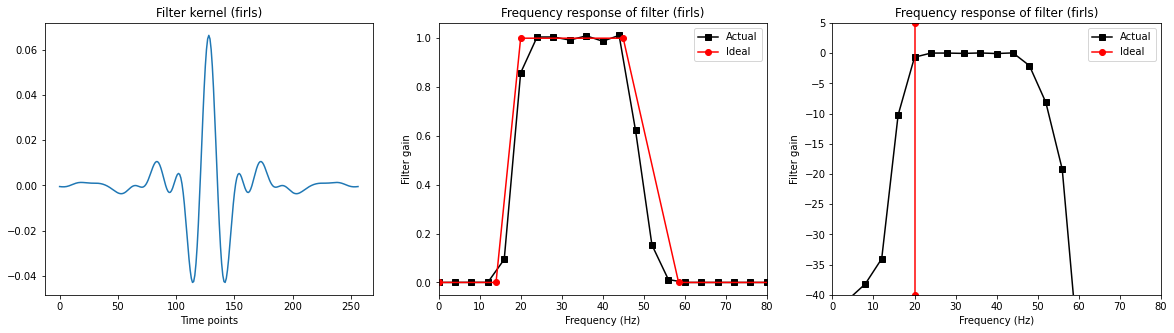

In [ ]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .3
order   = int( 5*srate/frange[0] )

# order must be odd
if order%2==0:
    order += 1

# define filter shape
shape = [ 0, 0, 1, 1, 0, 0 ]
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1],
         frange[1]+frange[1]*transw, nyquist ]

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=srate)

fig, axes = plt.subplots(1, 3, figsize=(20,5))

# time-domain filter kernel
axes[0].plot(filtkern)
axes[0].set_xlabel('Time points')
axes[0].set_title('Filter kernel (firls)')



# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fft.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
axes[1].plot(hz,filtpow,'ks-',label='Actual')
axes[1].plot(frex,shape,'ro-',label='Ideal')
axes[1].set_xlim([0,frange[0]*4])
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Filter gain')
axes[1].legend()
axes[1].set_title('Frequency response of filter (firls)')




# Same as above but logarithmically scaled
axes[2].plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
axes[2].plot([frange[0],frange[0]],[-40,5],'ro-',label='Ideal')
axes[2].set_xlim([0,frange[0]*4])
axes[2].set_ylim([-40,5])
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('Filter gain')
axes[2].legend()
axes[2].set_title('Frequency response of filter (firls)')

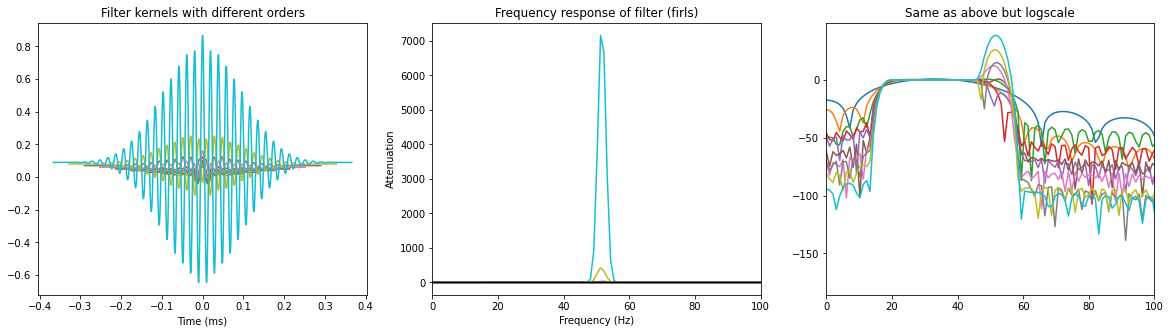

In [ ]:
## effects of the filter kernel order

# range of orders
ordersF = ( 1*srate/frange[0]) / (srate/1000)
ordersL = (15*srate/frange[0]) / (srate/1000)

orders = np.round( np.linspace(ordersF,ordersL,10) )

# initialize
fkernX = np.zeros((len(orders),1000))
hz = np.linspace(0,srate,1000)

fig, axes = plt.subplots(1, 3, figsize=(20,5))

for oi in range(0,len(orders)):

    # make sure order is odd-length
    ord2use = orders[oi]+(1-orders[oi]%2)

    # create filter kernel
    fkern = signal.firls(ord2use,frex,shape,fs=srate)

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fft.fft(fkern,1000))**2

    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    axes[0].plot(time,fkern+.01*oi)

axes[0].set_xlabel('Time (ms)')
axes[0].set_title('Filter kernels with different orders')


axes[1].plot(hz,fkernX.T)
axes[1].plot(frex,shape,'k')
axes[1].set_xlim([0,100])
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Attenuation')
axes[1].set_title('Frequency response of filter (firls)')


plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()

Text(0.5, 1.0, 'Same as above but log')

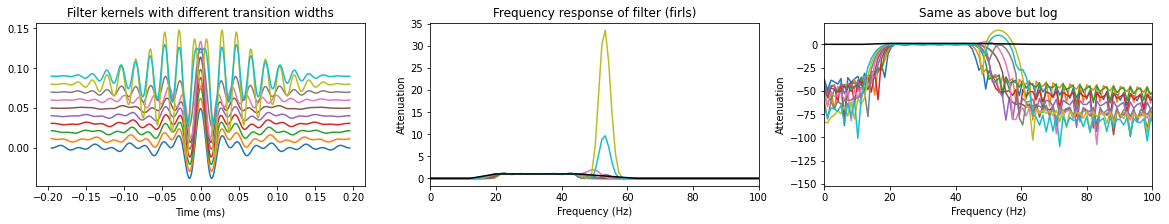

In [ ]:
## effects of the filter transition width

# range of transitions
transwidths = np.linspace(.01,.4,10)

# initialize
fkernX = np.zeros((len(transwidths),1000))
hz = np.linspace(0,srate,1000)

fig, axes = plt.subplots(1, 3, figsize=(20,3))

for ti in range(0,len(transwidths)):

    # create filter kernel
    frex  = [ 0, frange[0]-frange[0]*transwidths[ti], frange[0], frange[1], frange[1]+frange[1]*transwidths[ti], nyquist ]
    fkern = signal.firls(401,frex,shape,fs=srate)
    n     = len(fkern)

    # take its FFT
    fkernX[ti,:] = np.abs(scipy.fft.fft(fkern,1000))**2

    # show in plot
    time = np.arange(0,401)/srate
    time = time - np.mean(time)
    axes[0].plot(time,fkern+.01*ti)

axes[0].set_xlabel('Time (ms)')
axes[0].set_title('Filter kernels with different transition widths')


axes[1].plot(hz,fkernX.T)
axes[1].plot(frex,shape,'k')
axes[1].set_xlim([0,100])
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Attenuation')
axes[1].set_title('Frequency response of filter (firls)')



axes[2].plot(hz,10*np.log10(fkernX.T))
axes[2].plot(frex,shape,'k')
axes[2].set_xlim([0,100])
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('Attenuation')
axes[2].set_title('Same as above but log')


---
#FIR filters with firwin
---


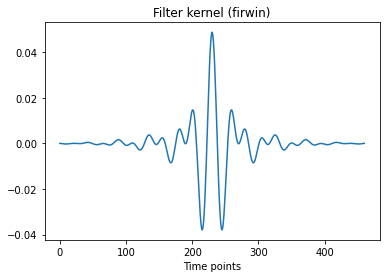

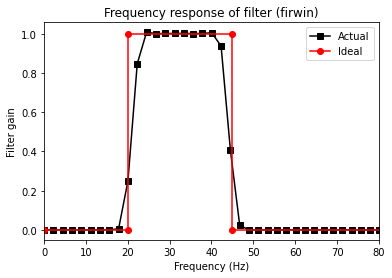

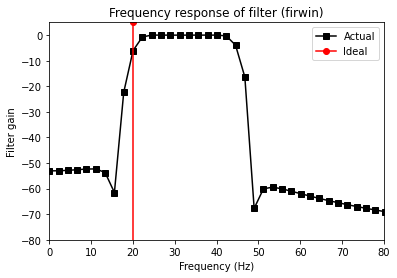

In [ ]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 9*srate/frange[0] ) #se o filtro não ficar muito bom, pode-se aumentar o valor da ordem


# force odd order
if order%2==0:
    order += 1

### --- NOTE: Python's firwin corresponds to MATLAB's fir1 --- ###

# filter kernel
filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firwin)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fft.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
plt.plot([frange[0],frange[0]],[-100,5],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.ylim([-80,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()

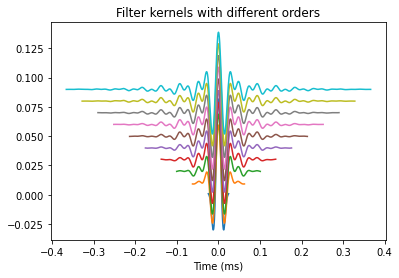

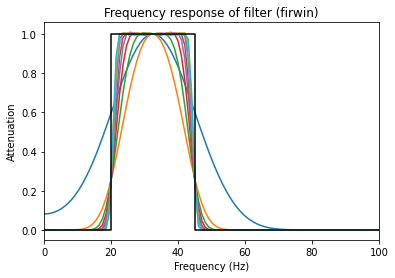

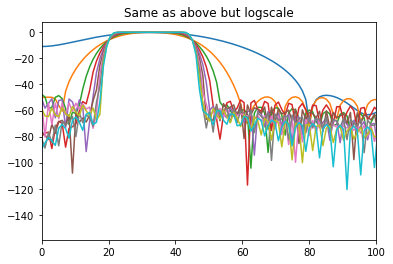

In [ ]:
## effects of the filter kernel order

# range of orders
orders = np.round( np.linspace( (srate/frange[0]) / (srate/1000),(15*srate/frange[0]) / (srate/1000) ,10) )


# initialize
fkernX = np.zeros((len(orders),1000))
hz = np.linspace(0,srate,1000)


for oi in range(0,len(orders)):

    # make sure order is odd-length
    ord2use = orders[oi]+(1-orders[oi]%2)

    # create filter kernel
    fkern = signal.firwin(int(ord2use),frange,fs=srate,pass_zero=False)

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fft.fft(fkern,1000))**2

    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*oi)

plt.xlabel('Time (ms)')
plt.title('Filter kernels with different orders')
plt.show()

plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firwin)')
plt.show()

plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()


---
#IIR Butterworth filters
---

> o kernel dele é curto, pois ele irá criar dois kernels, o primeiro é aplicado, o segundo é aplicado após o sinal ter sido filtrado pelo primeiro kernel

> sua vantagem é que ele roda de forma mais rápida, quando se está fazendo leituras em tempo real (tipo em BMI) isso é muito bom

>para avaliar esse filtro, não se faz o espectro, pois não funciona bem para ele

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


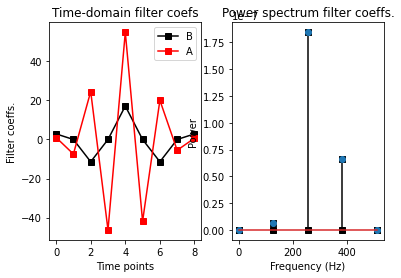

In [ ]:

# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]

# create filter coefficients
fkernB,fkernA = signal.butter(4,np.array(frange)/nyquist,btype='bandpass')

# power spectrum of filter coefficients
filtpow = np.abs(scipy.fft.fft(fkernB))**2
hz      = np.linspace(0,srate/2,int(np.floor(len(fkernB)/2)+1))


# plotting
plt.subplot(121)
plt.plot(fkernB*1e5,'ks-',label='B')
plt.plot(fkernA,'rs-',label='A')
plt.xlabel('Time points')
plt.ylabel('Filter coeffs.')
plt.title('Time-domain filter coefs')
plt.legend()

plt.subplot(122)
plt.stem(hz,filtpow[0:len(hz)],'ks-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power spectrum filter coeffs.')
plt.show()


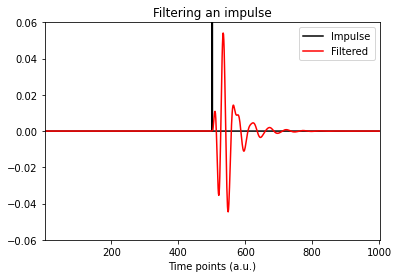

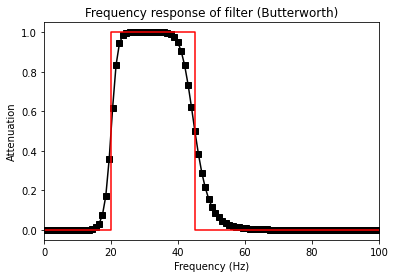

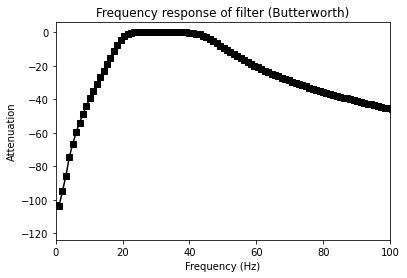

In [ ]:
## how to evaluate an IIR filter: filter an impulse

# generate the impulse
impres = np.zeros(1001)
impres[501] = 1

# apply the filter
fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)

# compute power spectrum
fimpX = np.abs(scipy.fft.fft(fimp))**2
hz = np.linspace(0,nyquist,int(np.floor(len(impres)/2)+1))


# plot
plt.plot(impres,'k',label='Impulse')
plt.plot(fimp,'r',label='Filtered')
plt.xlim([1,len(impres)])
plt.ylim([-.06,.06])
plt.legend()
plt.xlabel('Time points (a.u.)')
plt.title('Filtering an impulse')
plt.show()

plt.plot(hz,fimpX[0:len(hz)],'ks-')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()


plt.plot(hz,10*np.log10(fimpX[0:len(hz)]),'ks-')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

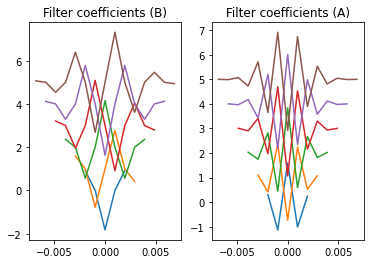

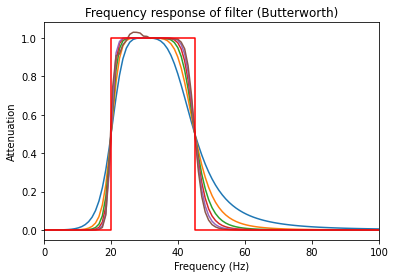

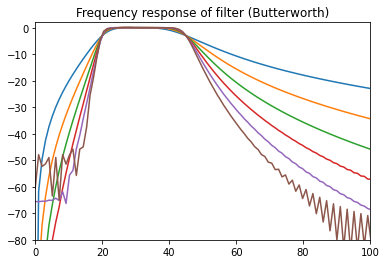

In [ ]:
## effects of order parameter

orders = range(2,8)

fkernX = np.zeros((len(orders),1001))
hz = np.linspace(0,srate,1001)


# loop over orders
for oi in range(0,len(orders)):

    # create filter kernel
    fkernB,fkernA = signal.butter(orders[oi],np.array(frange)/nyquist,btype='bandpass')
    n = len(fkernB)

    # filter the impulse response and take its power
    fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)
    fkernX[oi,:] = np.abs(scipy.fft.fft(fimp))**2


    # show in plot
    time = np.arange(0,len(fkernB))/srate
    time = time - np.mean(time)
    plt.subplot(121)
    plt.plot(time,scipy.stats.zscore(fkernB)+oi)
    plt.title('Filter coefficients (B)')

    plt.subplot(122)
    plt.plot(time,scipy.stats.zscore(fkernA)+oi)
    plt.title('Filter coefficients (A)')

plt.show()


# plot the spectra
plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

# in log space
plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.ylim([-80,2])
plt.title('Frequency response of filter (Butterworth)')
plt.show()


---
#FILTRO PASSA-BAIXA
---

Para criar:

```filtkern = signal.firls(order,frex,shape,fs=fs) ```

```filtkern = signal.firwin(int(order), 30, fs=fs) ```

Para aplicar:  
```yFilt = signal.filtfilt(filtkern,1,y)```

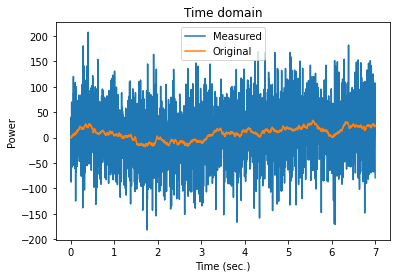

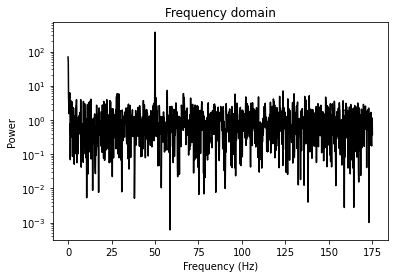

In [ ]:
# simulation parameters
fs      = 350 # hz
timevec = np.arange(0,fs*7-1)/fs
npnts   = len(timevec)

# generate signal
yOrig = np.cumsum(np.random.randn(npnts))
y     = yOrig + 50*np.random.randn(npnts) + 40*np.sin(2*np.pi*50*timevec)

# power spectrum of signal
yX = np.abs(scipy.fft.fft(y)/npnts)**2
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))


# plot the data
plt.plot(timevec,y,label='Measured')
plt.plot(timevec,yOrig,label='Original')
plt.xlabel('Time (sec.)')
plt.ylabel('Power')
plt.title('Time domain')
plt.legend()
plt.show()

# plot its power spectrum
plt.plot(hz,yX[0:len(hz)],'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')
plt.yscale('log')
plt.show()

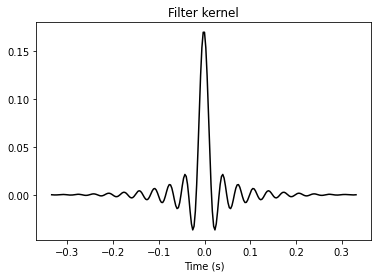

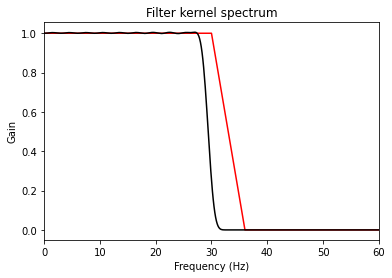

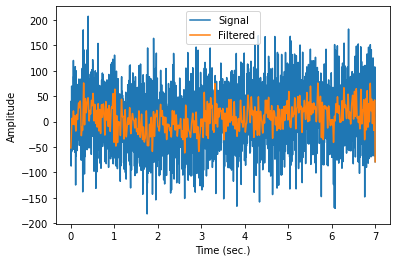

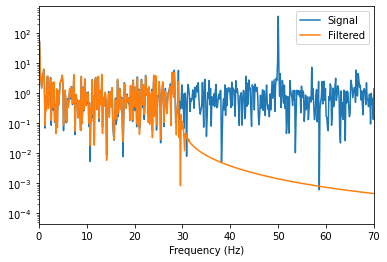

In [ ]:
## now for lowpass filter

fcutoff = 30
transw  = .2
order   = np.round( 20*fs/fcutoff )+1

shape   = [ 1,1,0,0 ]
frex    = [ 0, fcutoff, fcutoff+fcutoff*transw, fs/2 ]

# filter kernel
#filtkern = signal.firls(order,frex,shape,fs=fs) #ESSE É O MESMO FILTRO da linha de baixo, porém usando firls
filtkern = signal.firwin(int(order), 30, fs=fs)

# its power spectrum
filtkernX = np.abs(scipy.fft.fft(filtkern,npnts))**2



plt.plot(np.arange(-order/2,order/2)/fs,filtkern,'k')
plt.xlabel('Time (s)')
plt.title('Filter kernel')
plt.show()

plt.plot(np.array(frex),shape,'r')
plt.plot(hz,filtkernX[:len(hz)],'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Filter kernel spectrum')
plt.show()


### now apply the filter to the data
yFilt = signal.filtfilt(filtkern,1,y)

plt.plot(timevec,y,label='Signal')
plt.plot(timevec,yFilt,label='Filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

### power spectra of original and filtered signal
yOrigX = np.abs(scipy.fft.fft(y)/npnts)**2
yFiltX = np.abs(scipy.fft.fft(yFilt)/npnts)**2

plt.plot(hz,yOrigX[:len(hz)],label='Signal')
plt.plot(hz,yFiltX[:len(hz)],label='Filtered')
plt.xlim([0,fs/5])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.show()

In [ ]:
order

234.0